In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Question 1:
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
import acquire as ac
import prepare as pr

In [3]:
titanic = ac.get_titanic_data()

In [4]:
titanic = pr.prep_titanic_2(titanic)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,30.0,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [13]:
# need dummy columns: 
dummy_df = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na=False, drop_first=[True])
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic = titanic.drop(columns= ['sex', 'embark_town'])

In [14]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [15]:
train, val, test = train_validate_test_split(titanic, target='survived')

In [42]:
train.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [16]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = val.drop(columns=['survived'])
y_val = val.survived

X_test = val.drop(columns=['survived'])
y_test = val.survived

In [17]:
#baseline: the mode is the most frequent outcome
baseline = y_train.mode()

# Produce a boolean array with the True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")



Baseline accuracy: 0.62


# Question 2:
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   498 non-null    int64  
 1   age                      498 non-null    float64
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Queenstown   498 non-null    uint8  
 11  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 30.2 KB


,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.0,0,0,40.1250,1,1,0,0,1,0,0
165,3,9.0,0,2,20.5250,0,1,0,1,1,0,1
50,3,7.0,4,1,39.6875,0,1,0,1,1,0,1
259,2,50.0,0,1,26.0000,0,0,0,1,0,0,1
306,1,30.0,0,0,110.8833,1,0,0,0,0,0,0


In [30]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)
tree1 = tree1.fit(X_train, y_train)
y_predictions = tree1.predict(X_train)

In [41]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

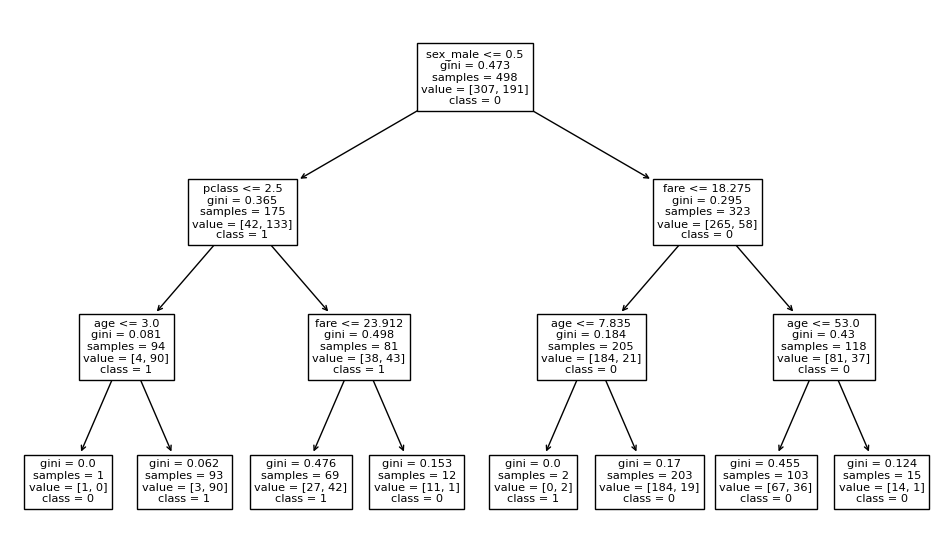

In [40]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()